In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import numpy as np

sgd = pd.read_csv("SGD_features.tab",header=None,sep='\t')
sgd[3] = sgd[3].str.strip()
#print(sgd)
def toSGD(standard):
    
    row = sgd[(sgd[3] == standard)]
    row2 = sgd[(sgd[4] == standard)]
    row3 = sgd[(sgd[5] == standard)]
    if (len(row)>0):
        return row[3].tolist()[0],row[15].tolist()[0]
    if (len(row2)>0):
        return row2[3].tolist()[0],row2[15].tolist()[0]
    if (len(row3)>0):
        return row3[3].tolist()[0],row3[15].tolist()[0]
    else:
        return "",""
  
class interaction:
    def __init__(self, line):
        self.line = line
        elem = line.split("\t")
        self.db = elem[0]
        self.source = elem[1]
        partners = elem[2].split(",")
        self.partners = set(map(self.strip_yeast, partners))

        try:
            self.confidence = float(elem[3].strip())
        except ValueError:
   
            self.confidence = 0
        
    def __repr__(self):
        return " ".join(self.partners)
    
    def strip_yeast(self, gene):
        return gene.split("_")[0]
    
    def has_gene(self, GOI):
       
        if GOI in self.partners:
            return self.partners - set([GOI])
        else:
            return set([])
    
cpdb = []        
fh = open('ConsensusPathDB_yeast_PPI.tsv')
for i, line in enumerate(fh):
    if i > 1:
        cpdb.append(interaction(line))


def search(GOI):
    partners = []
    conf = []
    for i in cpdb:
        if i.confidence > -0.00:
            genes = list(i.has_gene(GOI))
            partners = partners + genes 
            conf = conf + [i.confidence]*len(genes)
            #partners |= i.has_gene(GOI)
        
        
    return partners, conf
    
    
GOI = "HSF"
HSF1,conf = search(GOI)
for i,el in enumerate(HSF1):
    #print(el+"_YEAST")
    #print(conf[i])
    pass
    
GOI = "MSN2"
MSN2,conf = search(GOI)
for i,el in enumerate(MSN2):
    #print(el+"_YEAST")
    #print(conf[i])
    pass

    
GOI = "MSN4"
MSN4,conf = search(GOI)
for i,el in enumerate(MSN4):
    #print(el+"_YEAST") 
    #print(conf[i])
    pass

joined = list(set(HSF1) & set(MSN2) & set(MSN4))
notHSF1 = (set(MSN2) & set(MSN4))- set(joined)
notMSN2= (set(HSF1) & set(MSN4))- set(joined)
notMSN4= (set(HSF1) & set(MSN2))- set(joined)

        

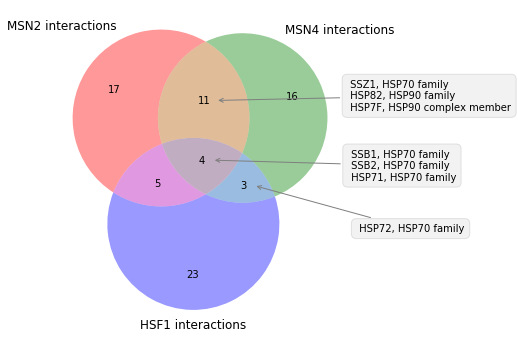

In [2]:
pos_hsf1 = HSF1
pos_msn4 = MSN4
pos_msn2 = MSN2

all = len(list(set(pos_hsf1) & set(pos_msn2) & set(pos_msn4)))

msn2_msn4 = len(list(set(pos_msn2) & set(pos_msn4))) - all 
hsf1_msn4 = len(list(set(pos_hsf1) & set(pos_msn4))) - all 
hsf1_msn2 = len(list(set(pos_hsf1) & set(pos_msn2))) - all 

hsf1 = len(pos_hsf1) - all - hsf1_msn4 - hsf1_msn2
msn2 = len(pos_msn2) - all - msn2_msn4 - hsf1_msn2
msn4 = len(pos_msn4) - all - msn2_msn4 - hsf1_msn4


# Make the diagram
v = venn3(subsets = (msn2, msn4, msn2_msn4, hsf1,hsf1_msn2, hsf1_msn4,all), set_labels = ('MSN2 interactions', 'MSN4 interactions', 'HSF1 interactions'))
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.annotate(' SSZ1, HSP70 family\n HSP82, HSP90 family\n HSP7F, HSP90 complex member', xy=v.get_label_by_id('110').get_position() +
             np.array([0.05, 0]), xytext=(+131,-10), ha='left',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))
plt.annotate(' SSB1, HSP70 family\n SSB2, HSP70 family\n HSP71, HSP70 family', xy=v.get_label_by_id('111').get_position() +
             np.array([0.05, 0]), xytext=(+135,-20), ha='left',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

plt.annotate(' HSP72, HSP70 family', xy=v.get_label_by_id('011').get_position() +
             np.array([0.05, 0]), xytext=(+102,-46), ha='left',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))


plt.show()
fig.savefig('generated_TF_Interactions.png', dpi=100)